In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [56]:
df = pd.read_csv('/content/lesson_3_data_1_.csv', encoding='windows-1251')

In [57]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,id_fam,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,10107064,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,10107064,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,10107064,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,10107064,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,10107064,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [58]:
#выбираем id и назввание продукта
user_df = df[["tc", 'art_sp']]

In [59]:
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [60]:
user_df = user_df.rename(columns={'tc': 'user_id',
                                  'art_sp':'brand_info'})

In [61]:
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [62]:
#вынимаем имя бренда из названия
def split_brand(brand_name_data):
  return brand_name_data.split()[-1]

In [63]:
brand_name = 'MARAVILLA 500 G Store_Brand'

In [64]:
user_df["brand_name"] = user_df.brand_info.apply(split_brand)

In [65]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [66]:
# user_df.brand_info.apply(lambda x: x.split()[-1])

In [67]:
#количество покупок каждого поситителя
user_purchases = user_df.groupby('user_id', as_index = False)\
  .agg({'brand_name': 'count'})\
  .rename(columns = {'brand_name':'purchases'})

In [68]:
user_purchases

,user_id,purchases
0,-1236394515,1
1,1031,6
2,4241,5
3,17311,2
4,17312,2
...,...,...
11759,1408817589,3
11760,1408825059,1
11761,1408832719,3
11762,1408840919,1


In [69]:
#лояльные покупатели - те, которые сделали много покупок. отнесем к ним тех, у кого количество покупок в районе третьего квартиля - 5 покупок
user_purchases.describe()

,user_id,purchases
count,1.176400e+04,11764.000000
mean,7.690517e+07,4.091210
std,1.622210e+08,4.573143
min,-1.236395e+09,1.000000
25%,1.503761e+07,1.000000
50%,4.682179e+07,2.000000
75%,9.311601e+07,5.000000
max,1.408849e+09,60.000000


In [70]:
#количество покупок каждого поситителя, у которого больше 5 покупок
user_purchases = user_df.groupby('user_id', as_index = False)\
  .agg({'brand_name': 'count'})\
  .rename(columns = {'brand_name':'purchases'})\
  .query('purchases >= 5')

In [71]:
user_purchases.purchases.median()

7.0

In [72]:
user_purchases.shape

(3383, 2)

In [73]:
user_purchases.describe()

,user_id,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [74]:
#выбираем количество уникальных покупок
user_purchases.nunique()

user_id      3383
purchases      45
dtype: int64

In [75]:
#выбираем люимый бренд
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index = False)\
  .agg({'brand_info': 'count'})\
  .sort_values(['user_id', 'brand_info'], ascending = [False, False])\
  .groupby('user_id')\
  .head(1)\
  .rename(columns = {'brand_name':'lovely_brand', 'brand_info': 'lovely_brand_purchases'})

In [76]:
#выбираем уникальный бренд
users_unique_brands = user_df.groupby('user_id', as_index = False)\
  .agg({'brand_name': pd.Series.nunique})\
  .rename(columns = {'brand_name':'unique_brands'})

In [77]:
#соединяем таблицы
loyalty_df = user_purchases.merge(users_unique_brands, on = 'user_id', how = "left")\
  .merge(lovely_brand_purchases_df, on = 'user_id')

In [78]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [79]:
#выбираем покупки, где один бренд
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

In [80]:
loyal_users

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


In [81]:
loyalty_df['loyalty_score'] = round(loyalty_df.lovely_brand_purchases/ loyalty_df.purchases, 2)

In [82]:
loyalty_df

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.83
1,4241,5,2,Brand_4,3,0.60
2,25971,7,2,Store_Brand,5,0.71
3,40911,27,5,Brand_4,19,0.70
4,45181,5,4,Store_Brand,2,0.40
...,...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5,1.00
3379,1408783189,10,2,Store_Brand,8,0.80
3380,1408783379,6,2,Brand_1,4,0.67
3381,1408798879,8,3,Store_Brand,4,0.50


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


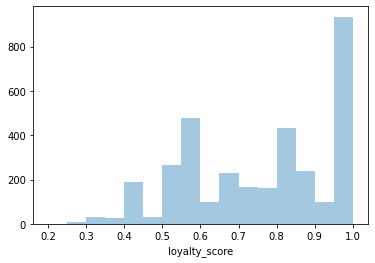

In [83]:
ax = sns.distplot(loyalty_df.loyalty_score, kde = False)

In [84]:
loyalty_1 = loyalty_df.groupby('lovely_brand', as_index = False)\
  .agg({'loyalty_score': 'median', 'user_id': 'count'})\
  .rename(columns = {'loyalty_score':'loyalty_score_median', 'user_id': 'people_amount'}) #.plot()

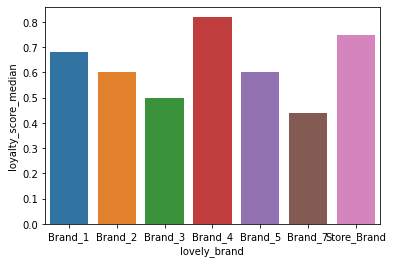

In [85]:
ax = sns.barplot(x = loyalty_1.lovely_brand, y = loyalty_1.loyalty_score_median, data = loyalty_1)

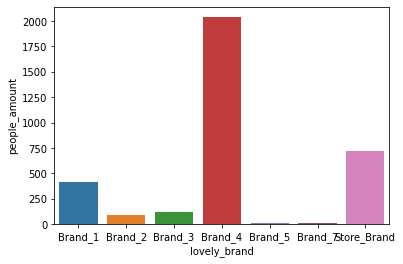

In [86]:
ax = sns.barplot(x = loyalty_1.lovely_brand, y = loyalty_1.people_amount, data = loyalty_1)